# Resources on Stochastic Gradient Descent

from GFG :

[Stochastic Gradient Descent:](https://www.geeksforgeeks.org/machine-learning/ml-stochastic-gradient-descent-sgd/)

And a Medium article :

[Stochastic Gradient Descent:](https://mohitmishra786687.medium.com/stochastic-gradient-descent-a-basic-explanation-cbddc63f08e0)

# Question 1


How does the learning rate affect the convergence of Stochastic Gradient Descent, and what are some common strategies for choosing or adapting the learning rate during training?


The learning rate is a speed regulator for training models.
If it is too high then it is referred to as overfitting which may cause the loss function to diverge wheraes if it is too slow then the model will take a lot of time in training and it might also get stuck at a local minimum.

Some strategies which allow a good learning rate are:

1. Initially keep a higher learning rate and then reduce it eventually to fine tune it as the model converges.

2. Also Adam is a very popular method in which the learning rate is adjusted automatically based on the history of gradients.


#  Question 2

`Gradient Descent vs Stochastic Gradient Descent`

Using the same preprocessed dataset from Question 2 from assignment-2'1, do the following:

a) Train a Linear Regression model using Batch Gradient Descent (GD)

b) Train a Linear Regression model using Stochastic Gradient Descent (SGD)

c) Choose suitable values for learning rate and number of epochs.

d) Predict house prices for the test dataset using both models.

e) Evaluate both models using:
Mean Squared Error (MSE) / R² Score

f) Print the evaluation results of GD and SGD in a clear comparison format.

g) Change the learning rate and epochs of the SGD model and observe how the performance changes.

h) Explain why does the SGD path behave so erratically compared to the GD path, and despite this "noise," why might SGD be preferred for very large datasets?

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

file_path = '/content/Real estate.csv'
df = pd.read_csv(file_path)

x = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train_b = np.c_[np.ones((x_train.shape[0], 1)), x_train]
x_test_b = np.c_[np.ones((x_test.shape[0], 1)), x_test]

def batch_gradient_descent(x, y, learning_rate=0.01, epochs=1000):
    m = len(y)
    theta = np.random.randn(x.shape[1], 1)
    cost_history = []

    for epoch in range(epochs):
        gradients = 2/m * x.T.dot(x.dot(theta) - y)
        theta = theta - learning_rate * gradients
        cost = np.sum((x.dot(theta) - y)**2) / (2 * m)
        cost_history.append(cost)

    return theta, cost_history

def stochastic_gradient_descent(x, y, learning_rate=0.01, epochs=1000):
    m = len(y)
    theta = np.random.randn(x.shape[1], 1)
    cost_history = []

    for epoch in range(epochs):
      indices = np.random.permutation(m)
      x_shuffled = x[indices]
      y_shuffled = y[indices]

      for i in range(m):
        xi = x_shuffled[i:i+1]
        yi = y_shuffled[i:i+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        theta = theta - learning_rate * gradients
      cost = np.sum((x.dot(theta) - y)**2) / (2 * m)
      cost_history.append(cost)

    return theta, cost_history

learning_rate = 0.01
epochs = 2000
batch_theta, batch_cost_history = batch_gradient_descent(x_train_b, y_train.reshape(-1, 1), learning_rate, epochs)
stochastic_theta, stochastic_cost_history = stochastic_gradient_descent(x_train_b, y_train.reshape(-1, 1), learning_rate, epochs)

y_pred = x_test_b.dot(batch_theta)
batch_mse = mean_squared_error(y_test, y_pred)
r2_batch = r2_score(y_test, y_pred)

y_pred = x_test_b.dot(stochastic_theta)
stochastic_mse = mean_squared_error(y_test, y_pred)
r2_stochastic = r2_score(y_test, y_pred)

print("Batch Gradient Descent:")
print(f"Mean Squared Error: {batch_mse:.4f}")
print(f"R² Score: {r2_batch:.4f}")

print("\nStochastic Gradient Descent:")
print(f"Mean Squared Error: {stochastic_mse:.4f}")
print(f"R² Score: {r2_stochastic:.4f}")


Batch Gradient Descent:
Mean Squared Error: 53.5018
R² Score: 0.6811

Stochastic Gradient Descent:
Mean Squared Error: 59.3137
R² Score: 0.6464


1. SGD is so erratic because it updates the model's weights using only one training example at a time so due to some outliers the error may increase temporarily.

2. Depite the noise SGD is preferred because it is computationally effective due to its high speed of updates and because it never gets stuck at local minima.

# Question 3

## Decision Trees


### 3.1 Theoretical and Numerical Questions

a) Is a **Decision Tree** a supervised or unsupervised learning algorithm?  
Give a brief explanation.

b) What is **entropy** in the context of decision trees?

c) What does **reduction in entropy** signify when a node is split in a decision tree?

d) You are given a dataset consisting of **10 data points**, each having:
- A class label (+ or −)
- A 2D feature vector $(x, y)$

All data points are initially present at the **root node** of a decision tree.

A **decision stump** (depth = 1 decision tree) is to be learned at the root using the **entropy reduction principle**.

**Allowed split questions:**


- ($x \le -2$?)
- ($x \le 2$?)
- ($y \le 2$?)

**Assumptions:**
- All logarithms are **base 2**


- $\log_2 3 = 1.58$
- $\log_2 5 = 2.32$

- Give answers **correct to at least 2 decimal places**

|S.No. | Class | (x, y) |
|----|-------|--------|
| 1  | − | (−3, 0) |
| 2  | + | (3, 3) |
| 3  | + | (1, 1) |
| 4  | + | (1, −1) |
| 5  | + | (−1, 1) |
| 6  | + | (−1, −1) |
| 7  | − | (1, 5) |
| 8  | − | (1, 3) |
| 9  | − | (−1, 5) |
| 10 | − | (−1, 3) |


Answer the following:
1. Compute the **entropy of the root node**
2. Compute the **entropy of the two child nodes** for each allowed split
3. Compute the **reduction in entropy** for each split
4. Identify **which split should be chosen** based on maximum entropy reduction



1. It is a supervised learning algorithm because they train on a labeled dataset where the target output is known and learns to make predictions on new unseen data.

2. Entropy is a measure of uncertainty. It quantifies the disorder of the class labels in a node. A node with once class an entropy of 0 while node with equal mix of classes has maximum entropy.

3. Reduction in entropy signifies information gain. It measures how much the uncertainity about the class labels decreases after splitting the data. The formula is $H(S) = - \sum p_i \log_2(p_i)$

4. For root node P(+) and P(-) are equal and 0.5 which gives entropy as 1

5. For the branch x<=-2 the entropy is 0 and 0.88 for true and false branch leading to a weighted entropy of 0.88 and gain equal to 0.12

6. For x<=2 it is same with weighted entropy being 0.88 and gain of 0.12

7. For y<=2 entropy would be 0.72 and gain being 0.28

Since the gain is maximum for y<=2 hence this branch should be chosen.

### 3.2 Coding Question (Decision Tree using Iris Dataset)

Write a Python program to **train and visualize a Decision Tree classifier** using the **Iris dataset**.

Your code should:
- Load the Iris dataset from `sklearn.datasets`
- Split the data into **70% training** and **30% testing** sets
- Train a Decision Tree classifier
- Plot the learned decision tree with appropriate **feature names** and **class labels**


Accuracy: 1.0


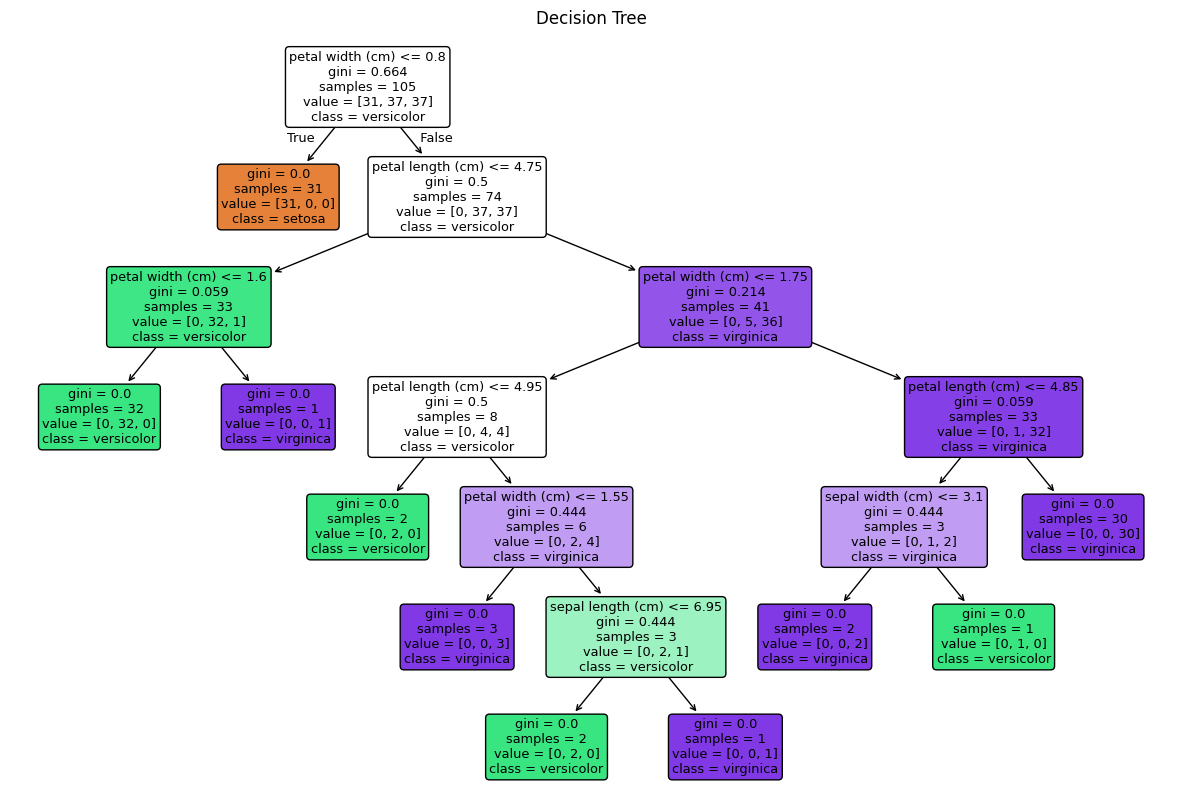

In [9]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

iris = load_iris()
x = iris.data
y = iris.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

accuracy = clf.score(x_test, y_test)
print(f"Accuracy: {accuracy}")

plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)
plt.title("Decision Tree")
plt.show()


# Question 4

## Support Vector Machines (SVM)


### 4.1 Theoretical

a) Is a **Support Vector Machine (SVM)** a supervised or unsupervised learning algorithm?  
Give a brief explanation.

b) What is a **margin** in SVM?  
Why does SVM aim to maximize the margin?

c) What are **support vectors**?  
Why are they important in defining the decision boundary?

d) What is the purpose of a **kernel function** in SVM?  
Name any two commonly used kernel functions.



1. It is a supervised learning algorithm as they require a labelled dataset to train and learns from mapping input features to target labels.

2. Margin is the perpendicular distance between the decision boundary and nearest data points from any of the classes. It is aimed to maximize this because it improves the model in the sense that is ensures that the decision boundary is as far away as possible and it also reduces the risk of misclassifying new unseen data points.

3. Supoort vectors are the data points that lie closet to the decision boundary and they are important because they define the orientation of the decision boundary.

4. Kernel fucntion allows SVM to handle non linearly separable data. It basically projects the original data into a higher dimensional space where the classes might become linearly separable.
Some commonly used Kernel functions are Linear Kernel and the polynomial kernel.

### 4.2 Conceptual

a) In a linearly separable dataset, how does SVM choose the **optimal separating hyperplane**?

b) What happens when the data is **not linearly separable**?  
Briefly explain how SVM handles this situation.

c) What is the role of the **regularization parameter `C`** in SVM?  
What happens when `C` is:
- Very large  
- Very small  

1. SVM chooses the optimal hyperplane by finding the maximum margin hyperplane by minimizing the distance from the support vectors.

2. It uses a kernel function to project the original 2-d data into a higher dimensional space where the data points become linearly separable.

3. C controls the tradeoff between maximizing the margin and minimizing classification errors on the training data.

4. If it is very large then the model is very strict and we get a narrow margin and a strict decision boundary which leads to overfitting.

5. If it is very small then the model is lenient and we get a wider margein which leads to underfitting.